In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('car.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None
year                0
make  

In [5]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


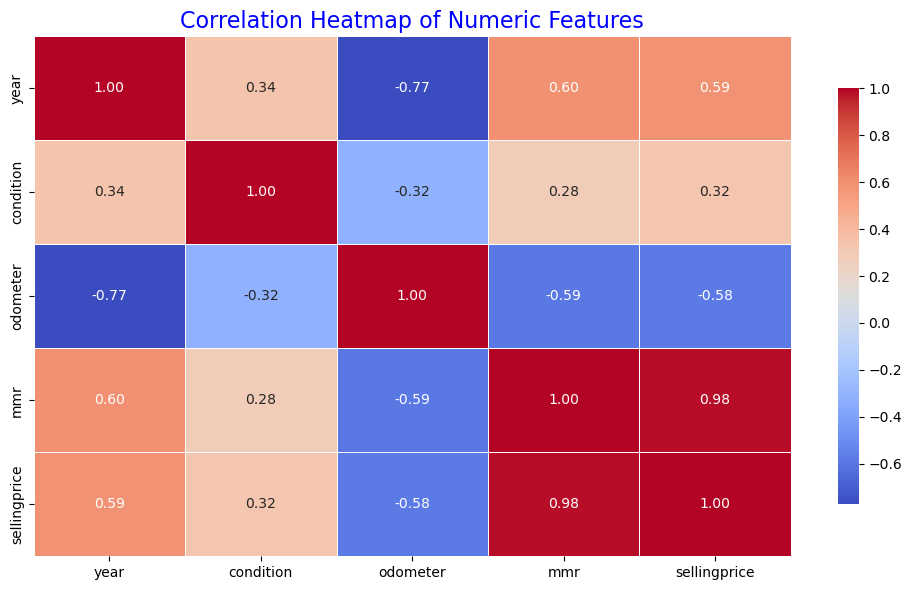

In [3]:
# Calculate correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include="number").corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,               # Show correlation values
    fmt=".2f",                # Format values to 2 decimal places
    cmap='coolwarm',          # Use a visually appealing colormap
    linewidths=0.5,           # Add lines between cells for better readability
    cbar_kws={'shrink': 0.8}  # Shrink the colorbar size
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, color='blue')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


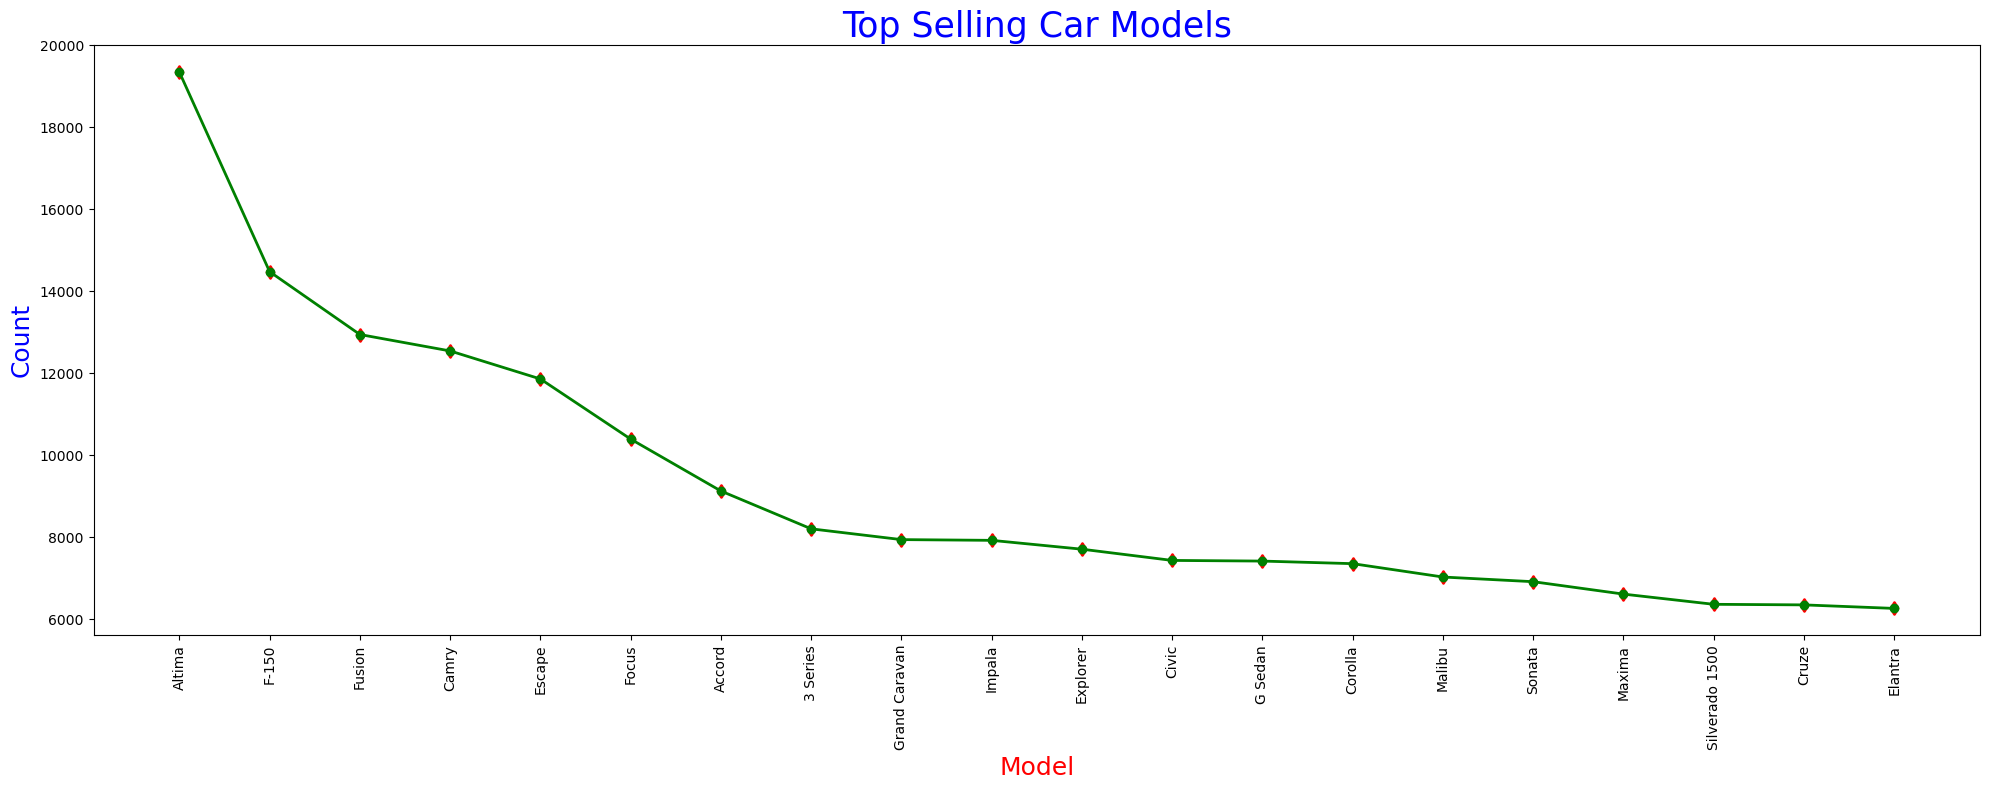

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_selling_models_line(data, column, save_path='top_selling_models_line.png', color='blue'):
    """
    Plots a line chart of the top 10 most frequently occurring values in the specified column, 
    dropping null values and allowing custom line colors.

    Parameters:
    - data (DataFrame): The dataset containing the column to analyze.
    - column (str): The column name to find the top values.
    - save_path (str): File path to save the figure. Default is 'top_selling_models_line.png'.
    - color (str): The color of the line in the line chart. Default is 'blue'.
    """
    # Drop null values in the specified column
    data = data.dropna(subset=[column])
    top_selling_models = data[column].value_counts().head(20)
    plt.figure(figsize=(20, 8))
    plt.plot(top_selling_models.index, top_selling_models.values, marker='o', color=color, linewidth=2)
    plt.scatter(top_selling_models.index, top_selling_models.values, marker='d', color='red', linewidth=2)
    plt.title("Top Selling Car Models", fontsize=25, color='blue')
    plt.xlabel("Model", fontsize=18, color='red')
    plt.ylabel("Count", fontsize=18, color='blue')
    plt.xticks(rotation=90)
    plt.savefig('top_selling_Car_models.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

plot_top_selling_models_line(df, 'model', color='green')

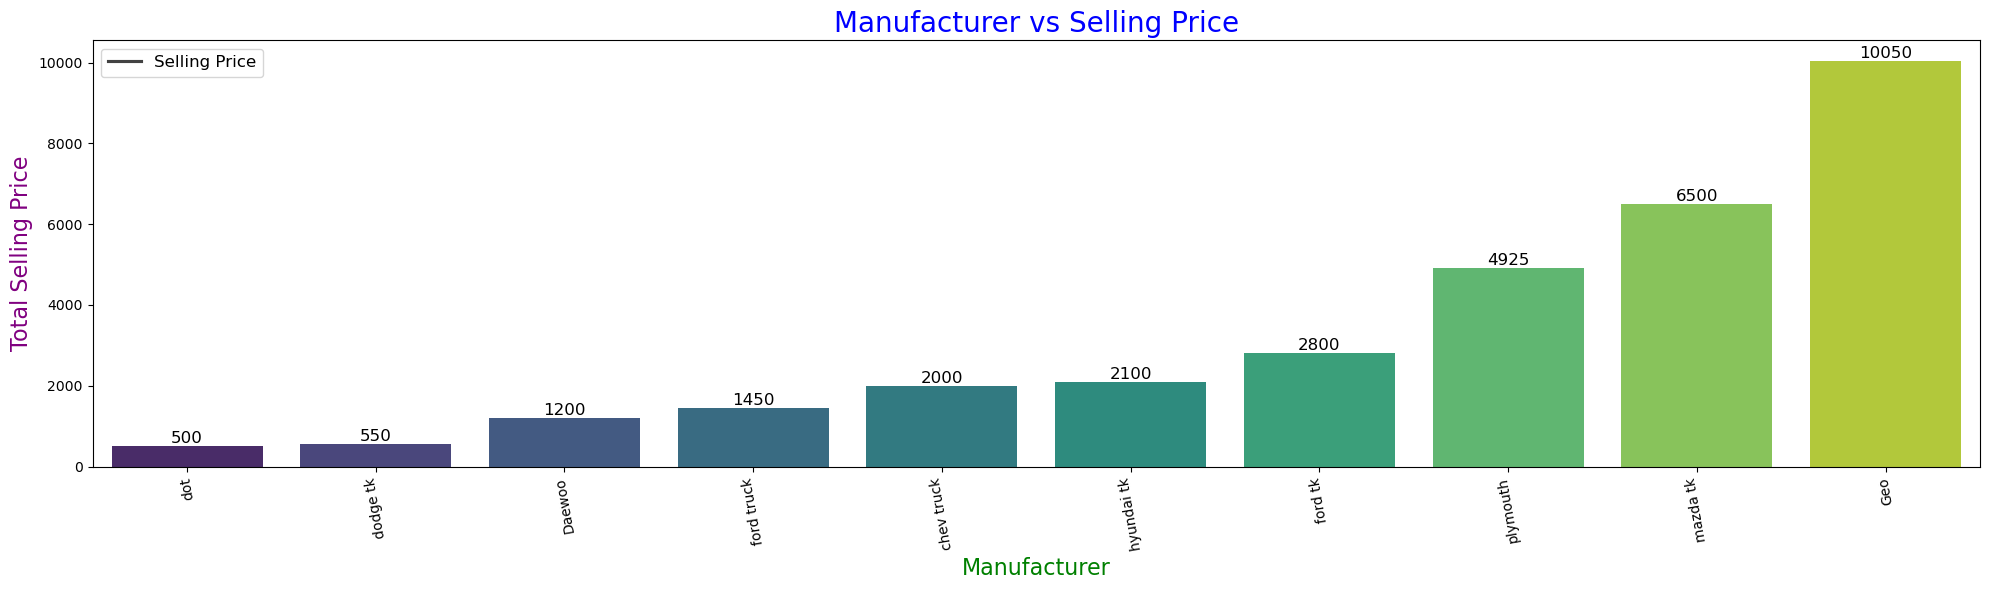

In [7]:
# Create the bar chart
def plot_manufacturer_vs_selling_price(data, save_path='manufacturer_vs_sellingprice.png', palette='viridis'):
    """
    Plots a bar chart of the top 10 manufacturers with the lowest total selling price, 
    including color labels, legend, and saving functionality.

    Parameters:
    - data (DataFrame): The dataset containing the 'make' and 'sellingprice' columns.
    - save_path (str): File path to save the figure. Default is 'manufacturer_vs_sellingprice.png'.
    - palette (str or list): The color palette for the bar chart. Default is 'viridis'.
    """
    # Group by 'make' and calculate the sum of selling price, filter the top 10 by lowest selling price
    grouped_data = data.groupby(['make'], as_index=False)['sellingprice'].sum().sort_values(by='sellingprice').head(10)
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(x='make', y='sellingprice', data=grouped_data, palette=palette)
    for bars in ax.containers:
        ax.bar_label(bars, fontsize=12, color='black')

    plt.title("Manufacturer vs Selling Price", fontsize=20, color='blue')
    plt.xlabel("Manufacturer", fontsize=16, color='green')
    plt.ylabel("Total Selling Price", fontsize=16, color='purple')
    plt.xticks(rotation=100)
    plt.legend(['Selling Price'], loc='upper left', fontsize=12)
    plt.savefig('Manufacturer vs Selling Price.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

plot_manufacturer_vs_selling_price(df)

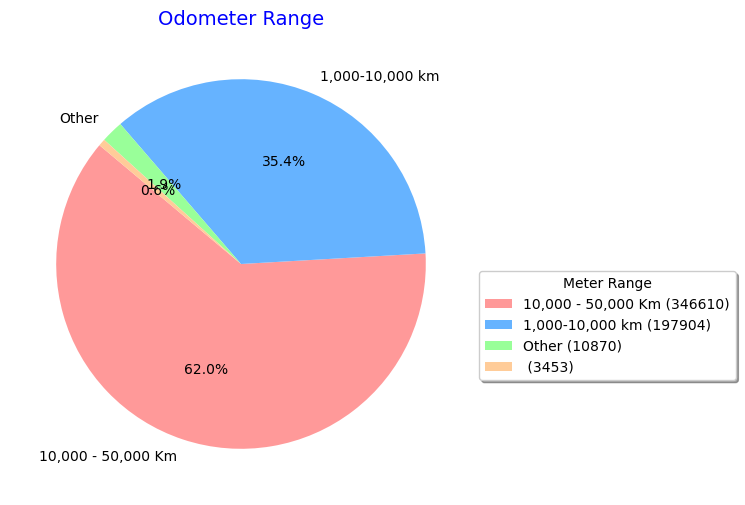

In [9]:
# Add legend with colors matching the pie chart
def set_range(value):
    if value <= 1000 or value > 100000:
        return 'Other'
    elif value <= 10000:
        return '1,000-10,000 km'
    elif value <= 50000:
        return '10,000 - 50,000 Km'
    else:
        return ''

df['Range'] = df['mmr'].apply(set_range)
count_ranges = df['Range'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Example color palette
wedges, texts, autotexts = plt.pie(
    count_ranges,
    labels=count_ranges.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Odometer Range',color='blue',fontsize=14)
plt.legend(loc="best",labels=[f"{label} ({value})" for label, value in zip(count_ranges.index, count_ranges)],
    title="Meter Range",bbox_to_anchor=(1, 0.5),fancybox=True,shadow=True
)
plt.savefig("odometer_range_pie_chart.png", bbox_inches="tight")
plt.grid(True)
plt.show()